In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_telco_data
from prepare import chop_data,prep_telco,keep_cust_prep_telco,charts_telco
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import KNeighborsClassifier

import warnings

warnings.filterwarnings('ignore')

this file exists, reading csv


In [8]:
base = prep_telco(get_telco_data)

In [9]:
trained_telco,validated_telco,tested_telco = chop_data(base,"churn")

In [55]:
trained_telco

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,security_backup,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2865,1,1,1,0,38,1,1,0,95.00,3591.25,0,1,1,0,1,0,0,1,0,0
4107,1,1,0,0,2,1,0,1,70.35,139.05,1,1,0,1,0,0,0,0,1,0
3453,0,1,1,0,11,1,0,0,19.95,214.75,1,0,0,1,0,0,0,0,0,1
923,0,0,0,0,10,1,1,1,86.05,834.10,1,1,0,1,0,0,1,0,0,0
2370,0,0,0,0,43,1,0,1,60.00,2548.55,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1,0,0,0,1,1,0,0,70.50,70.50,1,1,0,1,0,0,0,0,1,0
4999,0,1,0,0,47,1,1,0,59.60,2754.00,0,1,1,0,0,1,1,0,0,0
6892,0,0,1,0,72,1,1,1,116.95,8594.40,0,1,1,0,0,1,0,1,0,0
3718,0,0,0,0,8,1,1,1,86.55,649.65,1,1,0,1,0,0,0,0,1,0


In [10]:
c_trained_telco,c_validated_telco,c_tested_telco = chop_data(base,"churn")

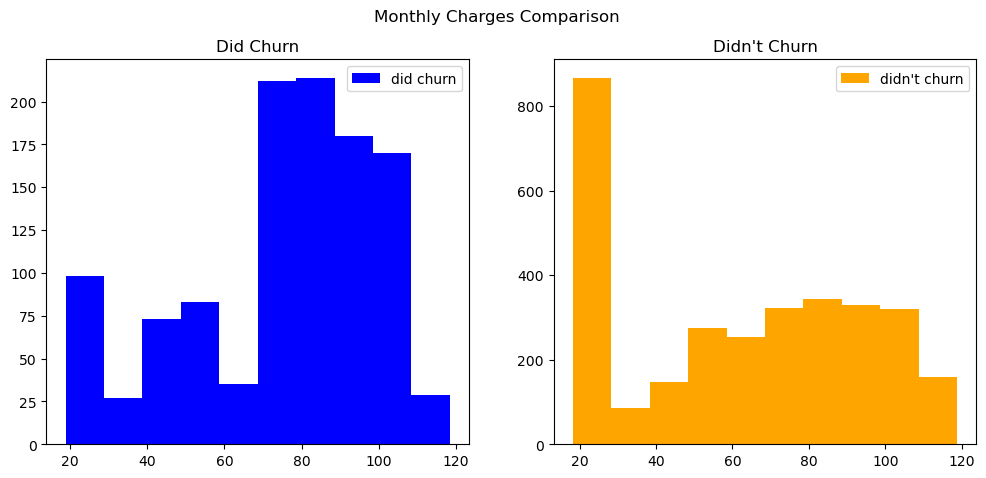

In [23]:
did_churn = trained_telco[trained_telco.churn == 1]
didnt_churn= trained_telco[trained_telco.churn == 0]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the first histogram for "did churn"
axs[0].hist(did_churn.monthly_charges, label="did churn", color='blue')
axs[0].set_title("Did Churn")
axs[0].legend()

# Plotting the second histogram for "didn't churn"
axs[1].hist(didnt_churn.monthly_charges, label="didn't churn", color='orange')
axs[1].set_title("Didn't Churn")
axs[1].legend()

# Adding a common title for the entire subplot
plt.suptitle("Monthly Charges Comparison")

# Display the plot
plt.show()


In [11]:
classy = DecisionTreeClassifier()

In [12]:
charges__churn_rate = pd.crosstab(columns=trained_telco.monthly_charges,index=trained_telco.churn)

In [13]:
charges__churn_rate

monthly_charges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,116.75,116.85,116.95,117.45,117.50,118.20,118.35,118.60,118.65,118.75
churn,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,2,2,1,3,5,...,1,1,1,0,1,1,0,1,1,1
1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [14]:
chi2, charges_pval, degf, expected = stats.chi2_contingency(charges__churn_rate)

In [15]:
charges_pval

6.78056517943106e-08

In [16]:
X_train = trained_telco.drop(columns="churn") #Create X_train variables that drop the survive target
X_validate = validated_telco.drop(columns='churn')
X_test = tested_telco.drop(columns='churn')

In [17]:
y_train = trained_telco.churn #Create y target variables
y_validate = validated_telco.churn
y_test = tested_telco.churn

In [20]:
y_train.value_counts(normalize=True)[0] #BASELINE ACCURACY CHURN

0.7346745562130178

In [21]:
# did_churn = trained_telco[trained_telco.churn == 1]
# didnt_churn= trained_telco[trained_telco.churn == 0]
# did_churn.monthly_charges.var()

In [22]:
#didnt_churn.monthly_charges.var()

In [26]:
classy.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_predictor = classy.predict(X_train)

In [28]:
y_predictor[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [29]:
classy.score(X_test,y_test)

0.7260468417317246

In [64]:
print(classification_report(y_train, classy.predict(X_train))) # Do I even need this?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



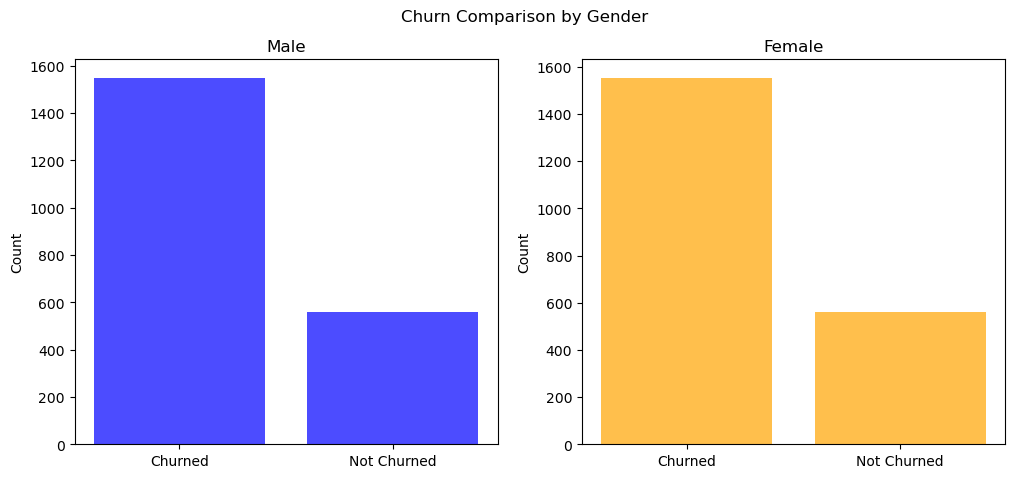

In [30]:
Male = trained_telco[trained_telco.gender == 1]
Female = trained_telco[trained_telco.gender == 0]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the first bar graph for "Male"
axs[0].bar(['Churned', 'Not Churned'], Male.churn.value_counts(), color='blue', alpha=0.7)
axs[0].set_title("Male")
axs[0].set_ylabel("Count")

# Plotting the second bar graph for "Female"
axs[1].bar(['Churned', 'Not Churned'], Female.churn.value_counts(), color='orange', alpha=0.7)
axs[1].set_title("Female")
axs[1].set_ylabel("Count")

# Adding a common title for the entire subplot
plt.suptitle("Churn Comparison by Gender")

# Display the plot
plt.show()


In [31]:
gender__churn_rate = pd.crosstab(columns=trained_telco.gender,index=trained_telco.churn)

In [32]:
gender__churn_rate

gender,0,1
churn,,
0,1554,1550
1,562,559


In [33]:
chi2, gender_pval, degf, expected = stats.chi2_contingency(gender__churn_rate)

In [34]:
gender_pval

0.996031931504371

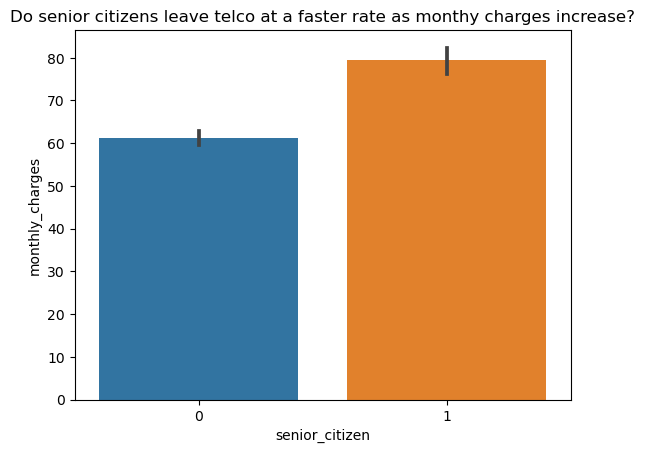

In [53]:
plt.title("Do senior citizens leave telco at a faster rate as monthy charges increase?")
sns.barplot(data=validated_telco, y="monthly_charges", x='senior_citizen') #check data senior citizens have higher charges ?? also look at churn rate
plt.show()

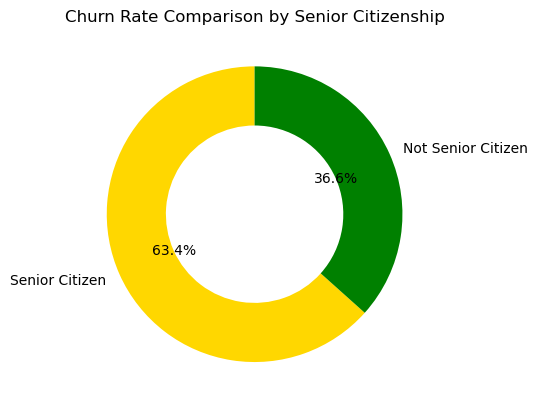

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 1 represents 'Senior Citizen' and 0 represents 'Not Senior Citizen'
senior_citizen_data = validated_telco[validated_telco['senior_citizen'] == 1]

# Calculate the churn rate for senior citizens
senior_citizen_churn_rate = senior_citizen_data['churn'].mean()

# Calculate the churn rate for non-senior citizens
non_senior_citizen_data = validated_telco[validated_telco['senior_citizen'] == 0]
non_senior_citizen_churn_rate = non_senior_citizen_data['churn'].mean()

# Create a pie chart
labels = ['Senior Citizen', 'Not Senior Citizen']
sizes = [senior_citizen_churn_rate, non_senior_citizen_churn_rate]
colors = ['gold', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

plt.title('Churn Rate Comparison by Senior Citizenship')
plt.show()


In [42]:
senior_churn_rate = pd.crosstab(columns=trained_telco.monthly_charges,index=trained_telco.senior_citizen)

In [43]:
senior_churn_rate

monthly_charges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,116.75,116.85,116.95,117.45,117.50,118.20,118.35,118.60,118.65,118.75
senior_citizen,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,2,3,1,4,6,...,0,1,1,0,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [56]:
chi2, senior_pval, degf, expected = stats.chi2_contingency(senior_churn_rate)

In [57]:
X_train3 = trained_telco.drop(columns="senior_citizen") 

In [58]:
y_train3 = trained_telco.senior_citizen

In [59]:
y_train3.value_counts(normalize=True)[0] #Accuracy score

0.8357396449704142

In [60]:
classy8=DecisionTreeClassifier(max_depth=8)

In [61]:
classy8.fit(X_train3,y_train3)

DecisionTreeClassifier(max_depth=8)

In [62]:
classy8.score(X_train3,y_train3)

0.8615384615384616

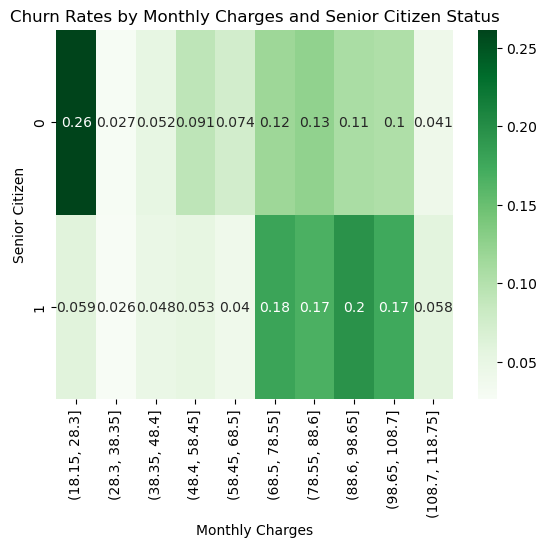

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called trained_telco
sns.heatmap(pd.crosstab(trained_telco['senior_citizen'], pd.cut(trained_telco['monthly_charges'], bins=10), normalize='index'), annot=True, cmap='Greens')

plt.title('Churn Rates by Monthly Charges and Senior Citizen Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Senior Citizen')
plt.show()

In [52]:
# plt.title("Do people with leave telco as monthy charges increase?")
# sns.barplot(y="monthly_charges", x="churn", data=trained_telco)
# churn_rate = trained_telco.monthly_charges.mean()
# plt.axhline(churn_rate)
# plt.show()

In [103]:
security_purchase_rate = pd.crosstab(columns=trained_telco.security_backup,index=trained_telco.gender)

In [104]:
security_purchase_rate

security_backup,0,1
gender,,
0,1098,1018
1,1128,981


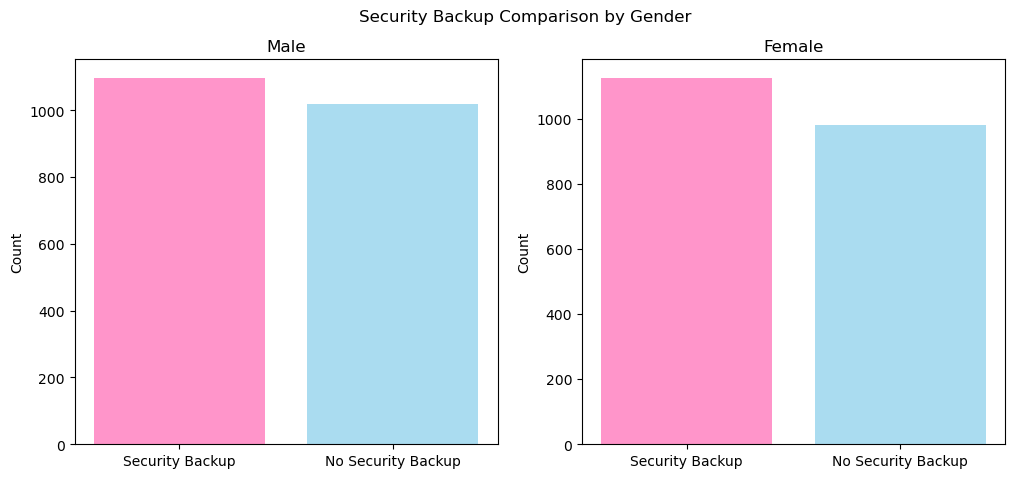

In [141]:
import matplotlib.pyplot as plt

# Assuming 1 represents 'Male' and 0 represents 'Female'
# isp.gender = isp.gender.map({"Male":0,"Female":1}).astype(int)
# Male = trained_telco[trained_telco.gender == 0]
# Female = trained_telco[trained_telco.gender == 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the first bar graph for "Male"
axs[0].bar(['Security Backup', 'No Security Backup'], Male.security_backup.value_counts(), color=['hotpink', 'skyblue'], alpha=0.7)
axs[0].set_title("Male")
axs[0].set_ylabel("Count")

# Plotting the second bar graph for "Female"
axs[1].bar(['Security Backup', 'No Security Backup'], Female.security_backup.value_counts(), color=['hotpink', 'skyblue'], alpha=0.7)
axs[1].set_title("Female")
axs[1].set_ylabel("Count")

# Adding a common title for the entire subplot
plt.suptitle("Security Backup Comparison by Gender")

# Display the plot
plt.show()


In [113]:
security_purchase_rate.value_counts()

0     1   
1098  1018    1
1128  981     1
Name: count, dtype: int64

In [128]:
chi2, security_pval, degf, expected = stats.chi2_contingency(security_purchase_rate)

In [129]:
security_pval

0.3138183526114294